In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
from lmfit import Parameters,minimize, fit_report
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_Linear_fit_period.ipynb
2022_Feb_week4_Linear_fit_period_Sine_fit.py
2022_Feb_week4_Linear_fit_period_lmfit.ipynb
2022_Feb_week4_Linear_fit_period_weighted_data.ipynb
2022_Feb_week4_Mean_calculation_T0_combined.txt
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_new_ephemeris_sin_fit.ipynb
2022_Feb_week4_new_ephemeris_sin_fit.out
2022_Feb_week4_new_ephemeris_sin_fit_mean_data.ipynb
2022_Feb_week4_new_ephemeris_sin_fit_weight_data.txt
interporate.out


In [3]:
#Read data ---#1
Input = "2022_Feb_week4_Linear_fit_period.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2450000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

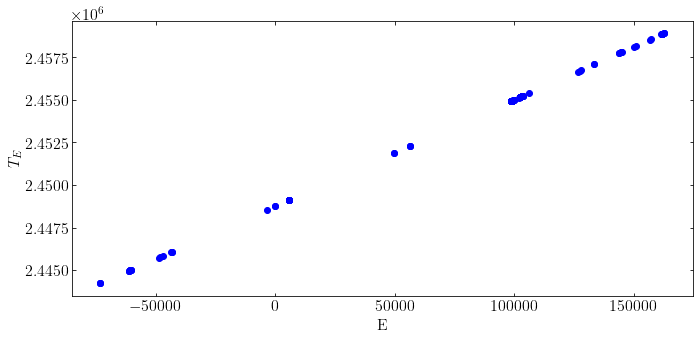

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [8]:
x = Epoch
y = T_obs
dy = T_obs_err

In [9]:
# Define the fitting function
def linear_fitting_lmfit(params,x,y):
    m = params['m']
    c = params['c']
    y_fit = m*x + c
    return y_fit-y

In [10]:
# Defining the various parameters
params = Parameters()
# Slope is bounded between min value of 1.0 and max value of 3.0
params.add('m', min=0.05, max=0.07)
# Intercept is made fixed at 0.0 value
params.add('c', value=2448773.214849387, vary = True)

In [11]:
# Calling the minimize function. Args contains the x and y data.
fitted_params = minimize(linear_fitting_lmfit, params, args=(x,y,), method='least_squares')

In [12]:
# Getting the fitted values
m = fitted_params.params['m'].value
c = fitted_params.params['c'].value    

In [13]:
# Printing the fitted values
print('The slope (m) is ', m)
print('The intercept (c) is ', c)

The slope (m) is  0.06236284513565314
The intercept (c) is  2448773.214849415


In [14]:
# Pretty printing all the statistical data
print(fit_report(fitted_params))

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 7
    # data points      = 114
    # variables        = 2
    chi-square         = 1.8386e-05
    reduced chi-square = 1.6416e-07
    Akaike info crit   = -1778.97231
    Bayesian info crit = -1773.49991
[[Variables]]
    m:  0.06236285 +/- 5.3284e-10 (0.00%) (init = 0.05)
    c:  2448773.21 +/- 5.4672e-05 (0.00%) (init = 2448773)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, c) = -0.720


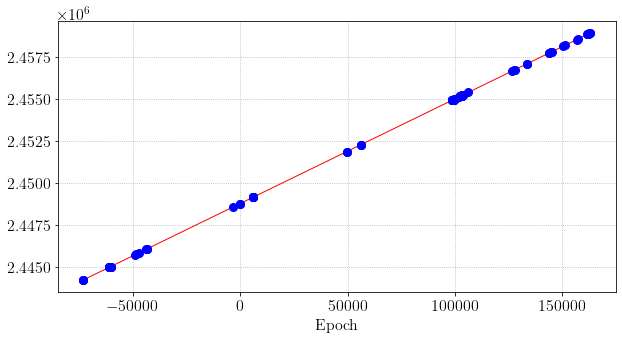

In [18]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function

plt.plot(x, m*x+c,c='red',ls='-',lw=1)


#plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
ax0.set_ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()